In [1]:
import sys
sys.path.append('..')
import utils

In [2]:
df, df_test = utils.get_index_2018_market_value_splits(market_name='ftse')
df['rw'] = utils.get_random_walk_data()
df.head()

../utils.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


,market_value,wn,rw
date,,,
1994-01-07,3445.98,3060.328767,1122.139662
1994-01-10,3440.58,4088.226022,1080.347860
1994-01-11,3413.77,5966.226873,1082.095245
1994-01-12,3372.02,5728.258890,1083.639265
1994-01-13,3360.01,4028.668621,1067.146255


In [3]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()
DATA_DIR = '../data'

## The DF Test

In [4]:
sts.adfuller(df.market_value)

(-1.9041551418836864,
 0.33010893277028336,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

Since p-value is 0.33, we can conclusively say it comes from stationary process.

## Using Returns
$$returns = \frac{P_t - P_{t-1}}{P_{t-1}} \times 100$$

In [5]:
df["returns"] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]

In [6]:
sts.adfuller(df.returns)

(-12.770265719497232,
 7.79805833603833e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.767245697501)

## ACF and PACF

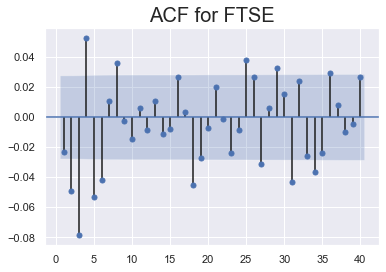

In [7]:
sgt.plot_acf(df.returns, zero=False, lags=40)
plt.title("ACF for FTSE", size=20)
plt.show()

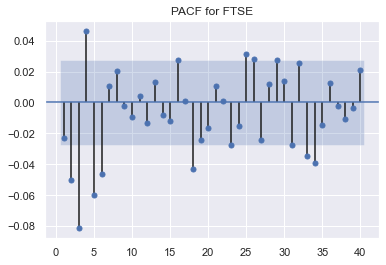

In [8]:
sgt.plot_pacf(df.returns, lags=40, alpha=0.05, zero=False, method=('ols'))
plt.title("PACF for FTSE")
plt.show()

## $AR_{1...}$ Tests

In [10]:
import numpy as np
models = [None]
llrs = []
model_ar_x_1 = None
for i in np.arange(1, 10):
    (model_ar_x_1, llr_x) = utils.ARMA_LLR_test(df.returns, model_ar_x_1, (i, 0))
    models.append(model_ar_x_1)
    llrs.append(llr_x)
    print(f'LLR test, Lags: {i}, p-value: {llr_x}')

LLR test, Lags: 1, p-value: None
LLR test, Lags: 2, p-value: 0.0
LLR test, Lags: 3, p-value: 0.0
LLR test, Lags: 4, p-value: 0.001
LLR test, Lags: 5, p-value: 0.0
LLR test, Lags: 6, p-value: 0.001
LLR test, Lags: 7, p-value: 0.44
LLR test, Lags: 8, p-value: 0.148
LLR test, Lags: 9, p-value: 0.885


In [ ]:
model_ret_ar_1 = models[1].fit()

In [ ]:
model_ret_ar_1.summary()

- p-value is over 0.05
- Neither is significantly different from 0
- This model holds no real predictive power
- The more easily yesterday's price is affected by higher lags -> the mroe inaccurate its coefficient becoms

Since neither coefficient is significantly different from 0, we can assume both are 0, so our predictions would always be 0.

In [ ]:
model_ret_ar_2 = models[2].fit()
model_ret_ar_2.summary()

In [ ]:
model_ret_ar_3 = models[3].fit()
model_ret_ar_3.summary()